In [18]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [19]:
data_dir = '/Users/bananaiselite/'
df_train = pd.read_csv(data_dir + 'titanic_train.csv')
df_test = pd.read_csv(data_dir + 'titanic_test.csv')

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
#缺失值過多或是判斷對預測值沒影響的欄位直接丟掉
df_train.drop(["Cabin","Name","Ticket", "PassengerId"],inplace=True,axis=1)

In [23]:
#年齡缺失值以平均值補上，剩下的缺失值丟棄
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train = df_train.dropna()

In [26]:
from sklearn.preprocessing import LabelEncoder
# 將非數字的資料型態以標籤編碼轉換
le = LabelEncoder()
df_train["Sex"]= le.fit_transform(df_train['Sex'])
df_train['Embarked']= le.fit_transform(df_train['Embarked'])

In [27]:
#再次查看dataframe,確認都已轉換
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
Y = df_train['Survived']
X = df_train.drop(['Survived'],axis=1)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)#切割數據集
clf = DecisionTreeClassifier(random_state=20
                            ,criterion="entropy")
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
score

0.8089887640449438

In [35]:
score = cross_val_score(clf,X,Y,cv=10).mean()
score

0.7863253319713994

0.8234039836567926


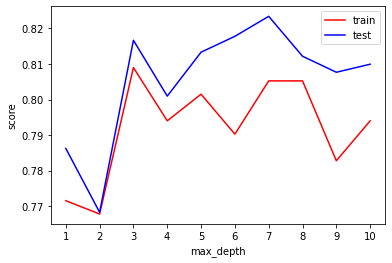

In [38]:
tr,te = [],[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=20
                            ,criterion="entropy"
                            ,max_depth=i+1)
    clf.fit(X_train, Y_train)
    score_train = clf.score(X_test,Y_test)
    score_test = cross_val_score(clf,X,Y,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)
print(max(te))    
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xlabel('max_depth'), plt.ylabel('score')
plt.xticks(range(1,11))
plt.legend()
plt.show()   

In [40]:
#用GridSearchCV尋找最佳數據
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
              }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [41]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [43]:
GS.best_score_

0.8328725038402458